In [1]:
#IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

In [17]:
df=pd.read_excel('input/SCKCEN Dataset -2.xlsx')

df.dropna(inplace=True)
##KJC exp
df[df['data']=='NO']

,Lab,T,a,W,B,b,da,Kjc,ys,e,klim,data,kjc1T
307,BAM,-40,13.73,25,12.5,11.27,2.05,569.4,492.0,230.1,206.2,NO,206.2
309,BAM,-40,14.02,25,12.5,10.98,1.93,548.7,492.0,230.1,203.6,NO,203.6
310,BAM,-40,14.13,25,12.5,10.87,1.67,529.9,492.0,230.1,202.5,NO,202.5
311,BAM,-40,13.62,25,12.5,11.38,0.36,318.5,492.0,230.1,207.2,NO,207.2
312,BAM,-40,13.77,25,12.5,11.23,2.07,574.8,492.0,230.1,205.9,NO,205.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,GKSS,0,56.78,100,50.0,43.22,5.09,778.3,473.3,227.5,393.9,NO,393.9
621,GKSS,0,56.91,100,50.0,43.09,3.73,682.2,473.3,227.5,393.3,NO,393.3
624,GKSS,0,56.65,100,50.0,43.35,3.05,642.5,473.3,227.5,394.4,NO,394.4
626,GKSS,0,56.57,100,50.0,43.43,4.84,758.4,473.3,227.5,394.8,NO,394.8


In [24]:
def mapper(kjc,b,data,kjc1T):
    res=20+((kjc-20)*(pow((b/25),(0.25))))
    if(data=='NO'):
        return res
    else:
        return kjc1T

In [26]:
df['kjc1T']=df.apply(lambda df: mapper(df['Kjc'],df['B'],df['data'],df['kjc1T']),axis=1)

In [30]:
df[df['data']=='NO']

,Lab,T,a,W,B,b,da,Kjc,ys,e,klim,data,kjc1T
307,BAM,-40,13.73,25,12.5,11.27,2.05,569.4,492.0,230.1,206.2,NO,481.988491
309,BAM,-40,14.02,25,12.5,10.98,1.93,548.7,492.0,230.1,203.6,NO,464.581935
310,BAM,-40,14.13,25,12.5,10.87,1.67,529.9,492.0,230.1,202.5,NO,448.773082
311,BAM,-40,13.62,25,12.5,11.38,0.36,318.5,492.0,230.1,207.2,NO,271.007580
312,BAM,-40,13.77,25,12.5,11.23,2.07,574.8,492.0,230.1,205.9,NO,486.529331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,GKSS,0,56.78,100,50.0,43.22,5.09,778.3,473.3,227.5,393.9,NO,921.775755
621,GKSS,0,56.91,100,50.0,43.09,3.73,682.2,473.3,227.5,393.3,NO,807.492952
624,GKSS,0,56.65,100,50.0,43.35,3.05,642.5,473.3,227.5,394.4,NO,760.281429
626,GKSS,0,56.57,100,50.0,43.43,4.84,758.4,473.3,227.5,394.8,NO,898.110534


In [32]:
df


,Lab,T,a,W,B,b,da,Kjc,ys,e,klim,data,kjc1T
0,GKSS,-154,14.47,25,12.5,10.53,0.00,54.8,674.5,237.6,237.2,YES,54.8
1,GKSS,-154,14.17,25,12.5,10.83,0.00,49.8,674.5,237.6,240.5,YES,49.8
2,GKSS,-154,14.15,25,12.5,10.85,0.00,37.8,674.5,237.6,240.8,YES,37.8
3,GKSS,-154,14.36,25,12.5,10.64,0.00,33.0,674.5,237.6,238.4,YES,33.0
4,GKSS,-154,14.06,25,12.5,10.94,0.00,38.9,674.5,237.6,241.8,YES,38.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,GKSS,0,113.65,200,100.0,86.35,0.41,307.6,473.3,227.5,556.7,YES,307.6
642,GKSS,0,111.81,200,100.0,88.19,0.81,383.0,473.3,227.5,562.6,YES,383.0
643,GKSS,0,113.63,200,100.0,86.37,0.57,332.6,473.3,227.5,556.8,YES,332.6
644,GKSS,0,112.54,200,100.0,87.46,0.00,223.6,473.3,227.5,560.3,YES,223.6


Mean Squared Error: 620.0147100414724
Mean Absolute Error: 17.433928035040115
R2 Score: 0.983111864667075
Root Mean Squared Error: 24.90009457896641


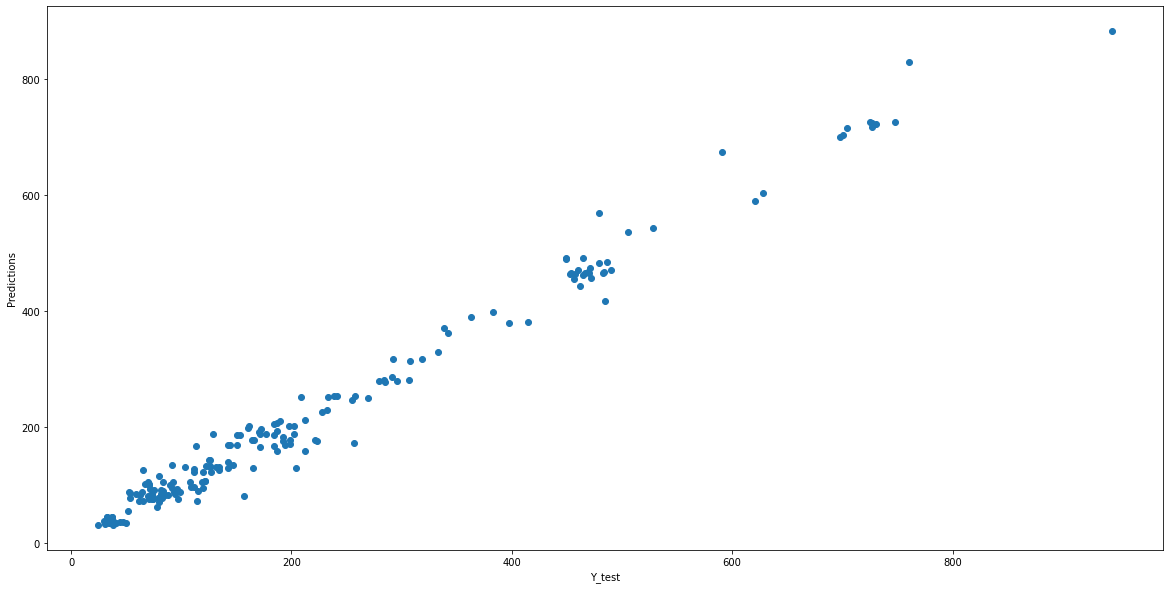

In [34]:
#including all values in the dataset


#dropping not useful columns using random forest regressor

X=df.drop(['Kjc','klim','Lab','data','kjc1T'],axis=1)
y=df['kjc1T']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

rf=RandomForestRegressor()

rf.fit(X_train,y_train)

predictions=rf.predict(X_test)

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)
rms=math.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rms}')

plt.figure(figsize=(20,10))

plt.scatter(y_test,predictions)
plt.xlabel('Y_test')
plt.ylabel('Predictions')
plt.savefig('Y_testVSPredictions.png',dpi=100)

In [35]:
#combining all the test dataset
df1=pd.DataFrame({'Y-test':np.array(y_test.values),'predictions':np.array(predictions)})

print("DF1")
print(df1)

print("DF2")
df2=X_test
print(df2)

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

df3 = pd.concat( [df1, df2], axis=1) 

print("CONCATENATED")
print(df3)

df3.rename(columns={"Y-test": "trueValue"},inplace=True)

DF1
     Y-test  predictions
0      70.5   100.419800
1      53.8    85.516000
2      69.9   105.671000
3      35.2    38.089000
4     118.6   105.436888
..      ...          ...
189   505.3   536.922564
190   700.8   703.779000
191    90.0   100.419800
192   128.7   188.143314
193   254.6   246.584654

[194 rows x 2 columns]
DF2
       T       a    W      B      b    da     ys      e
160  -91   14.29   25   12.5  10.71  0.00  538.9  233.5
261  -91  111.95  200  100.0  88.05  0.00  538.9  233.5
232  -91   55.29  100   50.0  44.71  0.00  538.9  233.5
14  -154   13.11   25   12.5  11.89  0.00  674.5  237.6
222  -91   27.47   50   25.0  22.53  0.00  538.9  233.5
..   ...     ...  ...    ...    ...   ...    ...    ...
528  -10   28.25   50   25.0  21.75  1.52  477.0  228.1
561    0   27.38   50   25.0  22.62  4.89  473.3  227.5
177  -91   14.29   25   12.5  10.71  0.00  538.9  233.5
398  -20   14.20   25   12.5  10.80  0.00  481.3  228.8
365  -40   28.14   50   25.0  21.86  0.25  492.0  23

In [36]:
#MERGING the training and test dataset now

predictionsOnTrain=rf.predict(X_train)

print("TRAINING DATASET")

df4=X_train
print("X_TRAIN\n\n")
print(df4)
df5=y_train
print("Y_TRAIN\n\n")
print(df5)

df6=pd.DataFrame({'trueValue':np.array(y_train.values),'predictions':np.array(predictionsOnTrain)})

df4.reset_index(drop=True, inplace=True)
df6.reset_index(drop=True, inplace=True)

df7 = pd.concat( [df4, df6], axis=1) 

print("\n\nTrain  Concatenated\n\n")

print(df7)

#Merging both the dataset

df8=pd.concat([df7,df3])
df8.reset_index(drop=True,inplace=True)

df8.rename(columns={"Y-test": "trueValue"},inplace=True)

print("Training and Test Merged\n\n")

print(df8)

#df8.to_excel('Output/predicted_Values(1).xlsx',sheet_name='Sheet1')

TRAINING DATASET
X_TRAIN


       T       a    W      B      b    da     ys      e
639    0  112.71  200  100.0  87.29  0.68  473.3  227.5
94  -154   56.35  100   50.0  43.65  0.00  674.5  237.6
272  -60   28.06   50   25.0  21.94  0.00  506.4  231.4
645    0  111.92  200  100.0  88.08  1.16  473.3  227.5
560    0   27.57   50   25.0  22.43  4.68  473.3  227.5
..   ...     ...  ...    ...    ...   ...    ...    ...
51  -154   26.43   50   25.0  23.57  0.00  674.5  237.6
257  -91  112.48  200  100.0  87.52  0.00  538.9  233.5
141 -110   14.37   25   12.5  10.63  0.00  567.6  234.7
542    0   14.12   25   12.5  10.88  0.28  473.3  227.5
367  -40   29.37   50   25.0  20.63  0.41  492.0  230.1

[452 rows x 8 columns]
Y_TRAIN


639    342.000000
94      31.400000
272    186.000000
645    442.200000
560    681.400000
          ...    
51      33.400000
257     96.800000
141     93.200000
542    249.732901
367    309.200000
Name: kjc1T, Length: 452, dtype: float64


Train  Concatenated


    